In [6]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [7]:
np.random.seed(9876789)#生成同样的随机数
nsample = 100
x = np.linspace(0, 10, 100)#在0-10之间生成100个数字
X = np.column_stack((x, x**2))#生成两列
beta = np.array([1, 0.1, 10])#β值
e = np.random.normal(size=nsample)#正态分布样本
X = sm.add_constant(X) #为模型增加常数项
y = np.dot(X, beta) + e #因变量

In [8]:
model = sm.OLS(y, X)#进行OLS回归
results = model.fit()#拟合值
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Mon, 25 Feb 2019   Prob (F-statistic):          2.83e-239
Time:                        18:45:18   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

In [9]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 1.34233516 -0.04024948 10.01025357]
R2:  0.9999879365025871


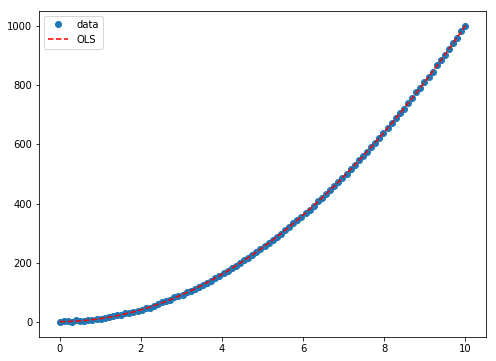

In [10]:
y_fitted = results.fittedvalues#拟合值
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(x,y,"o",label="data")
ax.plot(x,y_fitted,"r--",label="OLS")
ax.legend(loc="best")
plt.show()